1. IMPORT LIBRARIES

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

2. LOAD THE DATASET

In [45]:
df = pd.read_csv('Employee_Performance_and_Productivity_Data.csv')
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


3. BASIC DATA UNDERSTANDING

In [46]:
df.shape

(100000, 20)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [48]:
df.describe()

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,41.029410,4.476070,2.995430,6403.211000,44.956950,24.431170,14.514930,7.008550,50.090500,10.013560,49.506060,0.999720,2.999088
std,28867.657797,11.244121,2.869336,1.414726,1372.508717,8.942003,14.469584,8.664026,4.331591,35.351157,5.495405,28.890383,0.815872,1.150719
min,1.000000,22.000000,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25000.750000,31.000000,2.000000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000
50%,50000.500000,41.000000,4.000000,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000
75%,75000.250000,51.000000,7.000000,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000
max,100000.000000,60.000000,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,100.000000,19.000000,99.000000,2.000000,5.000000


4. CHECK MISSING VALUES

In [49]:
df.isnull().sum()

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

5. DROP UNNECESSARY COLUMNS

In [50]:
df = df.drop(['Employee_ID', 'Hire_Date'], axis=1)

6. CREATE PERFORMANCE LABELS

In [51]:
def performance_label(score):
    if score <= 4:
        return 'Low'
    elif score <= 7:
        return 'Medium'
    else:
        return 'High'

df['Performance_Level'] = df['Performance_Score'].apply(performance_label)

In [52]:
df[['Performance_Score', 'Performance_Level']].head()

,Performance_Score,Performance_Level
0,5,Medium
1,5,Medium
2,3,Low
3,2,Low
4,2,Low


7. DROP ORIGINAL SCORE

In [53]:
df = df.drop('Performance_Score', axis=1)

8. ENCODE CATEGORICAL VARIABLES

In [54]:
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

9. SPLIT FEATURES & TARGET

In [55]:
X = df.drop('Performance_Level', axis=1)
y = df['Performance_Level']

10. TRAIN-TEST SPLIT

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

11. FEATURE SCALING

In [57]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

12. EXPLORATORY DATA ANALYSIS

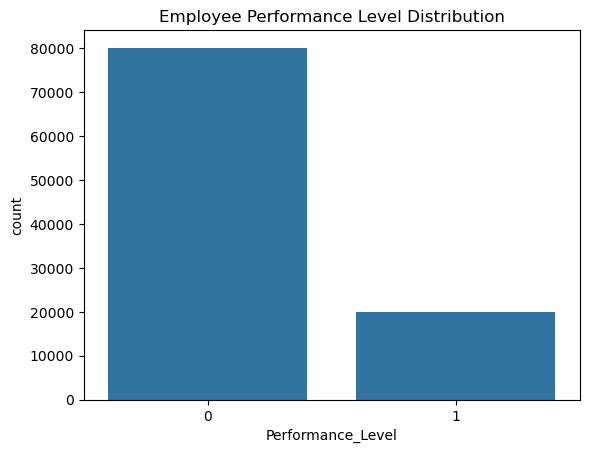

In [58]:
sns.countplot(x=y)
plt.title("Employee Performance Level Distribution")
plt.show()

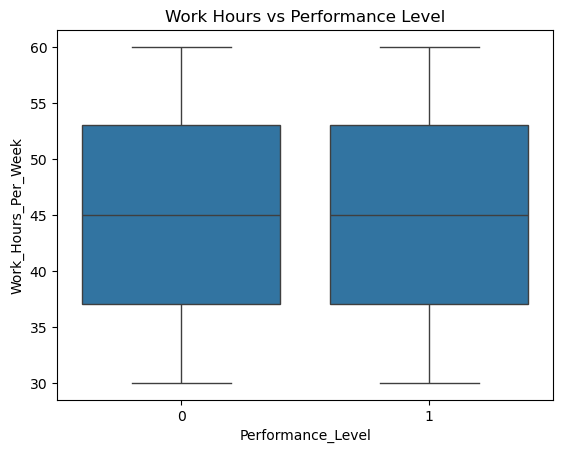

In [59]:
sns.boxplot(x=y, y=df['Work_Hours_Per_Week'])
plt.title("Work Hours vs Performance Level")
plt.show()

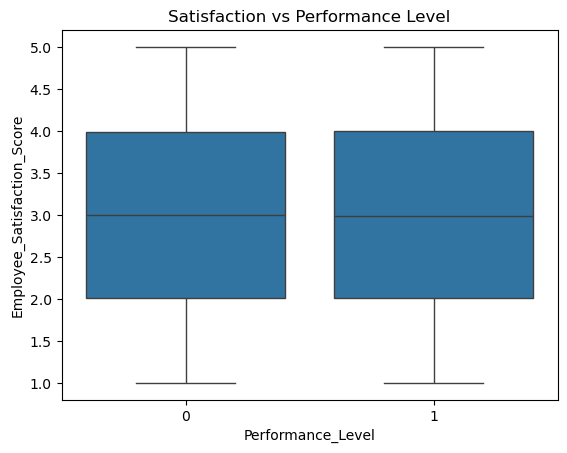

In [60]:
sns.boxplot(x=y, y=df['Employee_Satisfaction_Score'])
plt.title("Satisfaction vs Performance Level")
plt.show()

13. TRAIN BASIC ML MODEL

In [61]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

14. MODEL EVALUATION

In [62]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8591
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     16013
           1       1.00      0.29      0.45      3987

    accuracy                           0.86     20000
   macro avg       0.92      0.65      0.69     20000
weighted avg       0.88      0.86      0.83     20000



15. INTERPRETATION
The model predicts employee performance levels based on productivity, work hours, satisfaction, and experience-related features. Employee satisfaction and workload show noticeable influence on performance trends.